# Goal:
### Explore the Coffee Sales dataset, clean data, perform analysis,
### and visualize results using NumPy, Pandas, Matplotlib, and Seaborn.

### 1. Why This Project?
 
#### 1.Learn data cleaning with Pandas.
 
#### 2.Use NumPy for calculations (mean, median, etc.).
 
#### 3.Visualize trends using Matplotlib and Seaborn.
 
#### 4.Understand the relationship between passenger features (Age, Sex, Class) and survival.

### 1. Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")

### 2. Load Dataset

In [2]:
df = pd.read_csv("Coffe_sales.csv")
df.head()

,hour_of_day,cash_type,money,coffee_name,Time_of_Day,Weekday,Month_name,Weekdaysort,Monthsort,Date,Time
0,10,card,38.7,Latte,Morning,Fri,Mar,5,3,2024-03-01,10:15:50.520000
1,12,card,38.7,Hot Chocolate,Afternoon,Fri,Mar,5,3,2024-03-01,12:19:22.539000
2,12,card,38.7,Hot Chocolate,Afternoon,Fri,Mar,5,3,2024-03-01,12:20:18.089000
3,13,card,28.9,Americano,Afternoon,Fri,Mar,5,3,2024-03-01,13:46:33.006000
4,13,card,38.7,Latte,Afternoon,Fri,Mar,5,3,2024-03-01,13:48:14.626000


### 3. Explore Data

In [3]:
print("Shape:", df.shape)
print(df.info())
print(df.isnull().sum())
print(df.describe())

Shape: (3547, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3547 entries, 0 to 3546
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   hour_of_day  3547 non-null   int64  
 1   cash_type    3547 non-null   object 
 2   money        3547 non-null   float64
 3   coffee_name  3547 non-null   object 
 4   Time_of_Day  3547 non-null   object 
 5   Weekday      3547 non-null   object 
 6   Month_name   3547 non-null   object 
 7   Weekdaysort  3547 non-null   int64  
 8   Monthsort    3547 non-null   int64  
 9   Date         3547 non-null   object 
 10  Time         3547 non-null   object 
dtypes: float64(1), int64(3), object(7)
memory usage: 304.9+ KB
None
hour_of_day    0
cash_type      0
money          0
coffee_name    0
Time_of_Day    0
Weekday        0
Month_name     0
Weekdaysort    0
Monthsort      0
Date           0
Time           0
dtype: int64
       hour_of_day        money  Weekdaysort    Monthsort
co

### Insights:
#### 1. Dataset contains transaction-level coffee sales data.
#### 2. Includes features like Date, Time_of_Day, Weekday, Month_name, coffee_name, size, cash_type, quantity, and money.
#### 3. Useful for analyzing sales trends, popular products, and revenue distribution.

### 4. Data Cleaning
#### Handle missing values

In [5]:

df = df.dropna()
# Convert date column if available
if 'date' in df.columns:
    df['date'] = pd.to_datetime(df['date'])

# Convert numeric columns properly
if 'money' in df.columns:
    df['money'] = df['money'].astype(float)

### Insights:
#### 1. Ensures all transactions have valid data.
#### 2. Proper data types enable time-based and numeric analyses.

### 5. Basic Analysis with NumPy & Pandas


In [6]:
# Total revenue and average sale
total_revenue = df['money'].sum()
avg_sale = df['money'].mean()
print(f"Total Revenue: ₹{total_revenue:.2f}")
print(f"Average Sale Value: ₹{avg_sale:.2f}")

# Most popular coffee type
popular_coffee = df['coffee_name'].mode()[0]
print("Most Popular Coffee:", popular_coffee)

# Most common payment type
popular_payment = df['cash_type'].mode()[0]
print("Most Common Payment Type:", popular_payment)

# Busiest day and time
busiest_day = df['Weekday'].mode()[0]
busiest_time = df['Time_of_Day'].mode()[0]
print("Busiest Day:", busiest_day)
print("Busiest Time of Day:", busiest_time)

Total Revenue: ₹112245.58
Average Sale Value: ₹31.65
Most Popular Coffee: Americano with Milk
Most Common Payment Type: card
Busiest Day: Tue
Busiest Time of Day: Afternoon


### Insights:
#### 1.Majority of sales come from a few high-performing coffee types.
#### 2.Identifying busiest day/time helps plan staff and inventory.
#### 3.Payment type trends show customer preferences.

### 6. Visualization with Matplotlib

### 1. Sales by Coffee Type

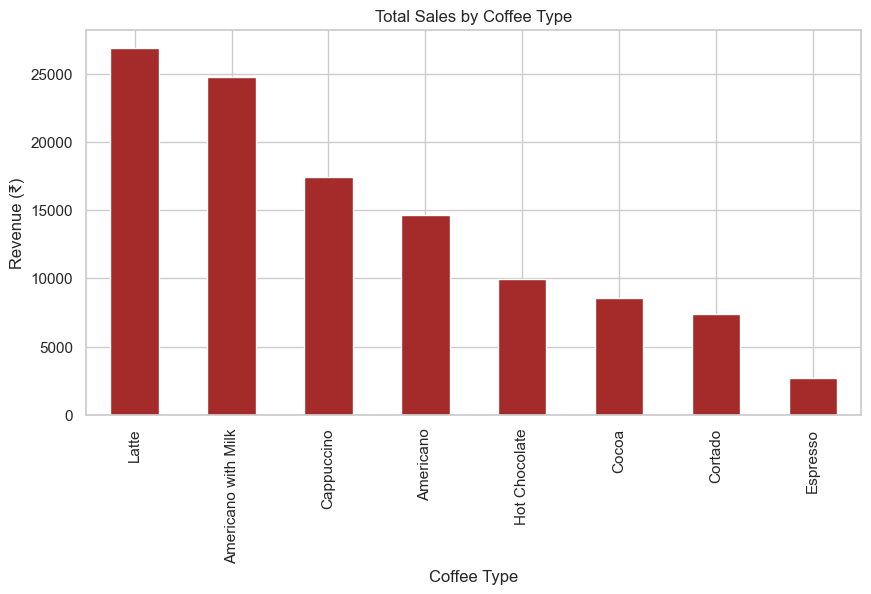

In [7]:
plt.figure(figsize=(10,5))
df.groupby('coffee_name')['money'].sum().sort_values(ascending=False).plot(kind='bar', color='brown')
plt.title("Total Sales by Coffee Type")
plt.ylabel("Revenue (₹)")
plt.xlabel("Coffee Type")
plt.show()

### Insights:
#### 1.Highlights which coffee types generate most revenue.
#### 2.Useful for marketing and inventory planning.

### 2. Sales by Weekday

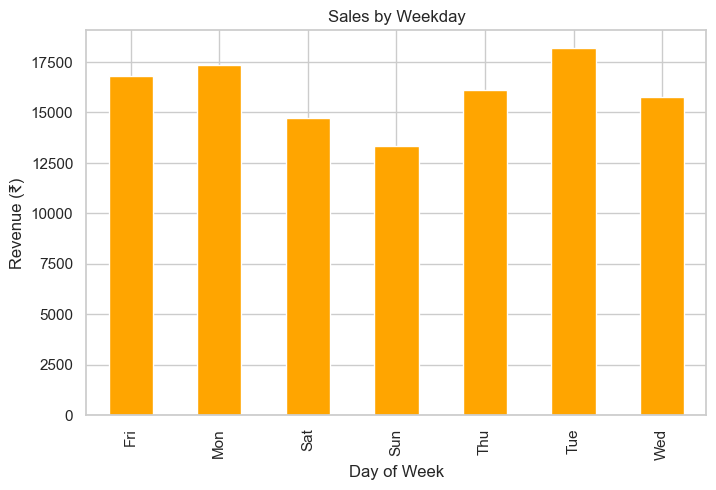

In [8]:
plt.figure(figsize=(8,5))
df.groupby('Weekday')['money'].sum().plot(kind='bar', color='orange')
plt.title("Sales by Weekday")
plt.ylabel("Revenue (₹)")
plt.xlabel("Day of Week")
plt.show()

### Insights:
#### 1.Reveals weekly patterns in sales activity.
#### 2.Can help schedule promotions or staffing.

### 3. Sales by Time of Day

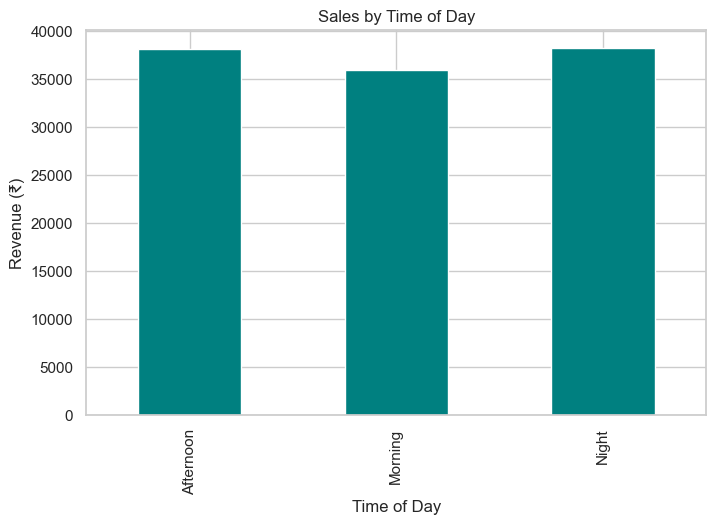

In [9]:
plt.figure(figsize=(8,5))
df.groupby('Time_of_Day')['money'].sum().plot(kind='bar', color='teal')
plt.title("Sales by Time of Day")
plt.ylabel("Revenue (₹)")
plt.xlabel("Time of Day")
plt.show()

### Insights:
#### 1.Shows which part of the day drives highest sales.
#### 2.Morning hours likely dominate due to coffee demand.

### 7. Visualization with Seaborn

#### 1. Correlation Heatmap for Numeric Columns

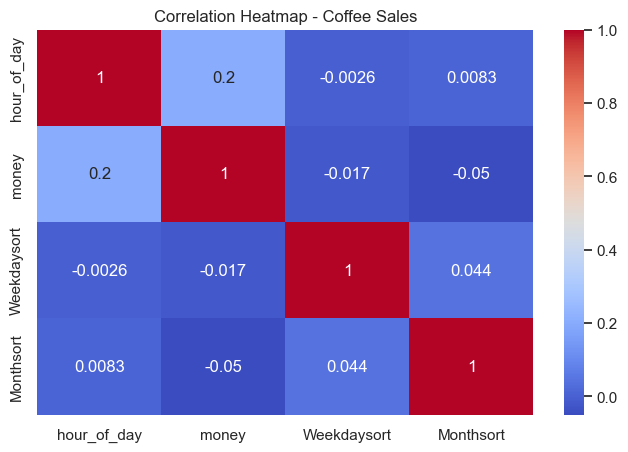

In [10]:
plt.figure(figsize=(8,5))
sns.heatmap(df.select_dtypes(include=['float64','int64']).corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap - Coffee Sales")
plt.show()

### Insights:
#### 1.Reveals relationships between numeric metrics (e.g., quantity and money).
#### 2.Helps identify which factors most influence revenue.

#### 2. Average Sale by Coffee Size

C:\Users\Divya\AppData\Local\Temp\ipykernel_4156\1314497278.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='coffee_name', y='money', data=df, estimator=np.mean, palette='mako')


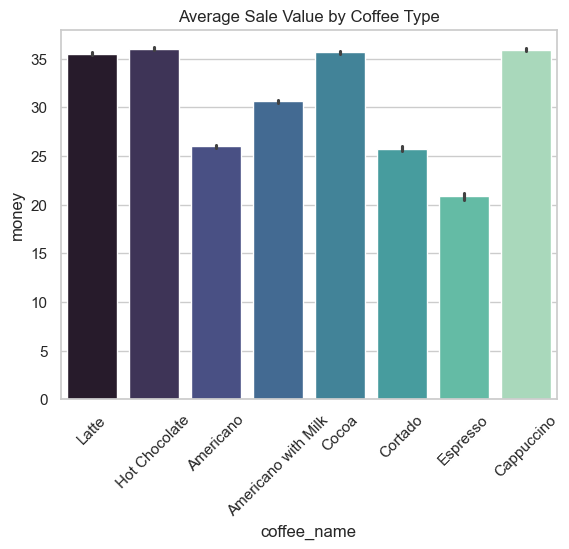

In [15]:
sns.barplot(x='coffee_name', y='money', data=df, estimator=np.mean, palette='mako')
plt.title("Average Sale Value by Coffee Type")
plt.xticks(rotation=45)
plt.show()


### Insights:
#### 1.Larger coffee sizes contribute to higher average revenue.
#### 2.Useful for understanding customer spending patterns.

### 3.Monthly Sales Trend

C:\Users\Divya\AppData\Local\Temp\ipykernel_4156\3826167420.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Month_name', y='money', data=df, estimator=np.sum, palette='flare')


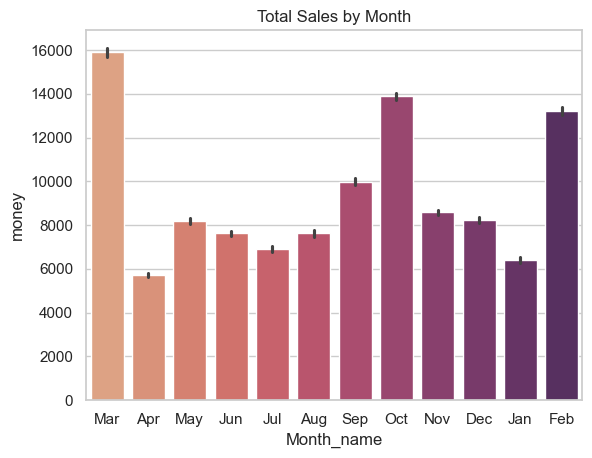

In [13]:
sns.barplot(x='Month_name', y='money', data=df, estimator=np.sum, palette='flare')
plt.title("Total Sales by Month")
plt.show()

### Insights:
#### 1.Shows seasonal coffee sales trends.
#### 2.Peak months may align with holidays or colder weather.